In [1]:
from network import *
from utils import model_dropdown, canvas_to_mnist
from PIL import Image
import matplotlib.pyplot as plt
from canvas import DrawingWidget
from IPython.display import display

In [2]:
model_dd = model_dropdown()
display(model_dd)

Dropdown(description='model', options=('mnist_relu_256_0.1_1000.npz', 'mnist_relu_256_0.1_10000.npz', 'mnist_r…

In [3]:
model_name = model_dd.value

MNIST_TRAIN = "data/mnist_train.csv"
MNIST_TEST = "data/mnist_test.csv"


_, _, X_test, y_test = load_data(MNIST_TRAIN, MNIST_TEST)

y_test_encoded = one_hot_encode(y_test, 10)

print(f"Loading {model_name}")
nn = Network.load(model_name)

Loading mnist_relu_256_0.1_1000.npz


In [4]:
y_test_pred = nn.predict(X_test)
y_test_pred_encoded = one_hot_encode(y_test_pred)
test_accuracy = accuracy(y_test_encoded, y_test_pred_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 94.32%


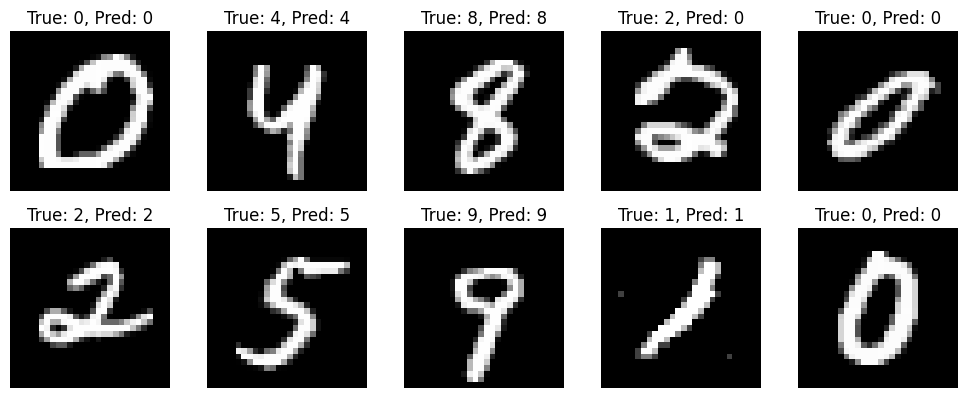

In [5]:
def plot_predictions(X_test, y_test, y_pred, num_samples=10):
    plt.figure(figsize=(10, 10))

    for i in range(num_samples):
        idx = np.random.randint(0, X_test.shape[0])

        image = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        predicted_label = y_pred[idx]

        plt.subplot(5, 5, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


plot_predictions(X_test, y_test, y_test_pred, num_samples=10)

In [6]:
def on_predict(img):
    display(Image.fromarray((img * 255).astype(np.uint8)))
    x = canvas_to_mnist(img)
    print(x.shape, x.dtype, x.min(), x.max())
    print("pred:", nn.predict(x)[0])


drawing_widget = DrawingWidget(
    width=500, height=500, background="#000", default_style="#fff"
)
display(drawing_widget.show(on_predict=on_predict))